In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv(r"C:\Users\Shubham\Desktop\Projects\DataTrained\Week 2\winequality-red.csv")

Data has been called and read, given to the variable df

Now we explore the data to create a better understanding of the data and to visualise what is to done to optimise it for better working

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We see that there are no null values with this above representation, however let us clear it up for better view for any lost data

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can note that there are no null values and hence we dont have to insert any data to complete the table

In [ ]:
import warnings
warnings.filterwarnings('ignore')

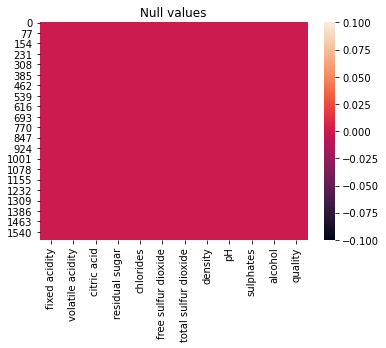

In [ ]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

This heatmap gives a visualization of the presence of any empty set or null values, we can see that there are no null values

Since we have to generate the model to produce good and bad wine, let us add another column to the dataset for the classification. Here, we take any data with quality 7 and over as good and the rest as bad. Qualify good as 1 and bad as 0  

In [ ]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

Let us check it out

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Now, let us check out the correlation between the columns to understand the weightage for each to the output

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


we can also visualise the correlation through heatmap for better understanding

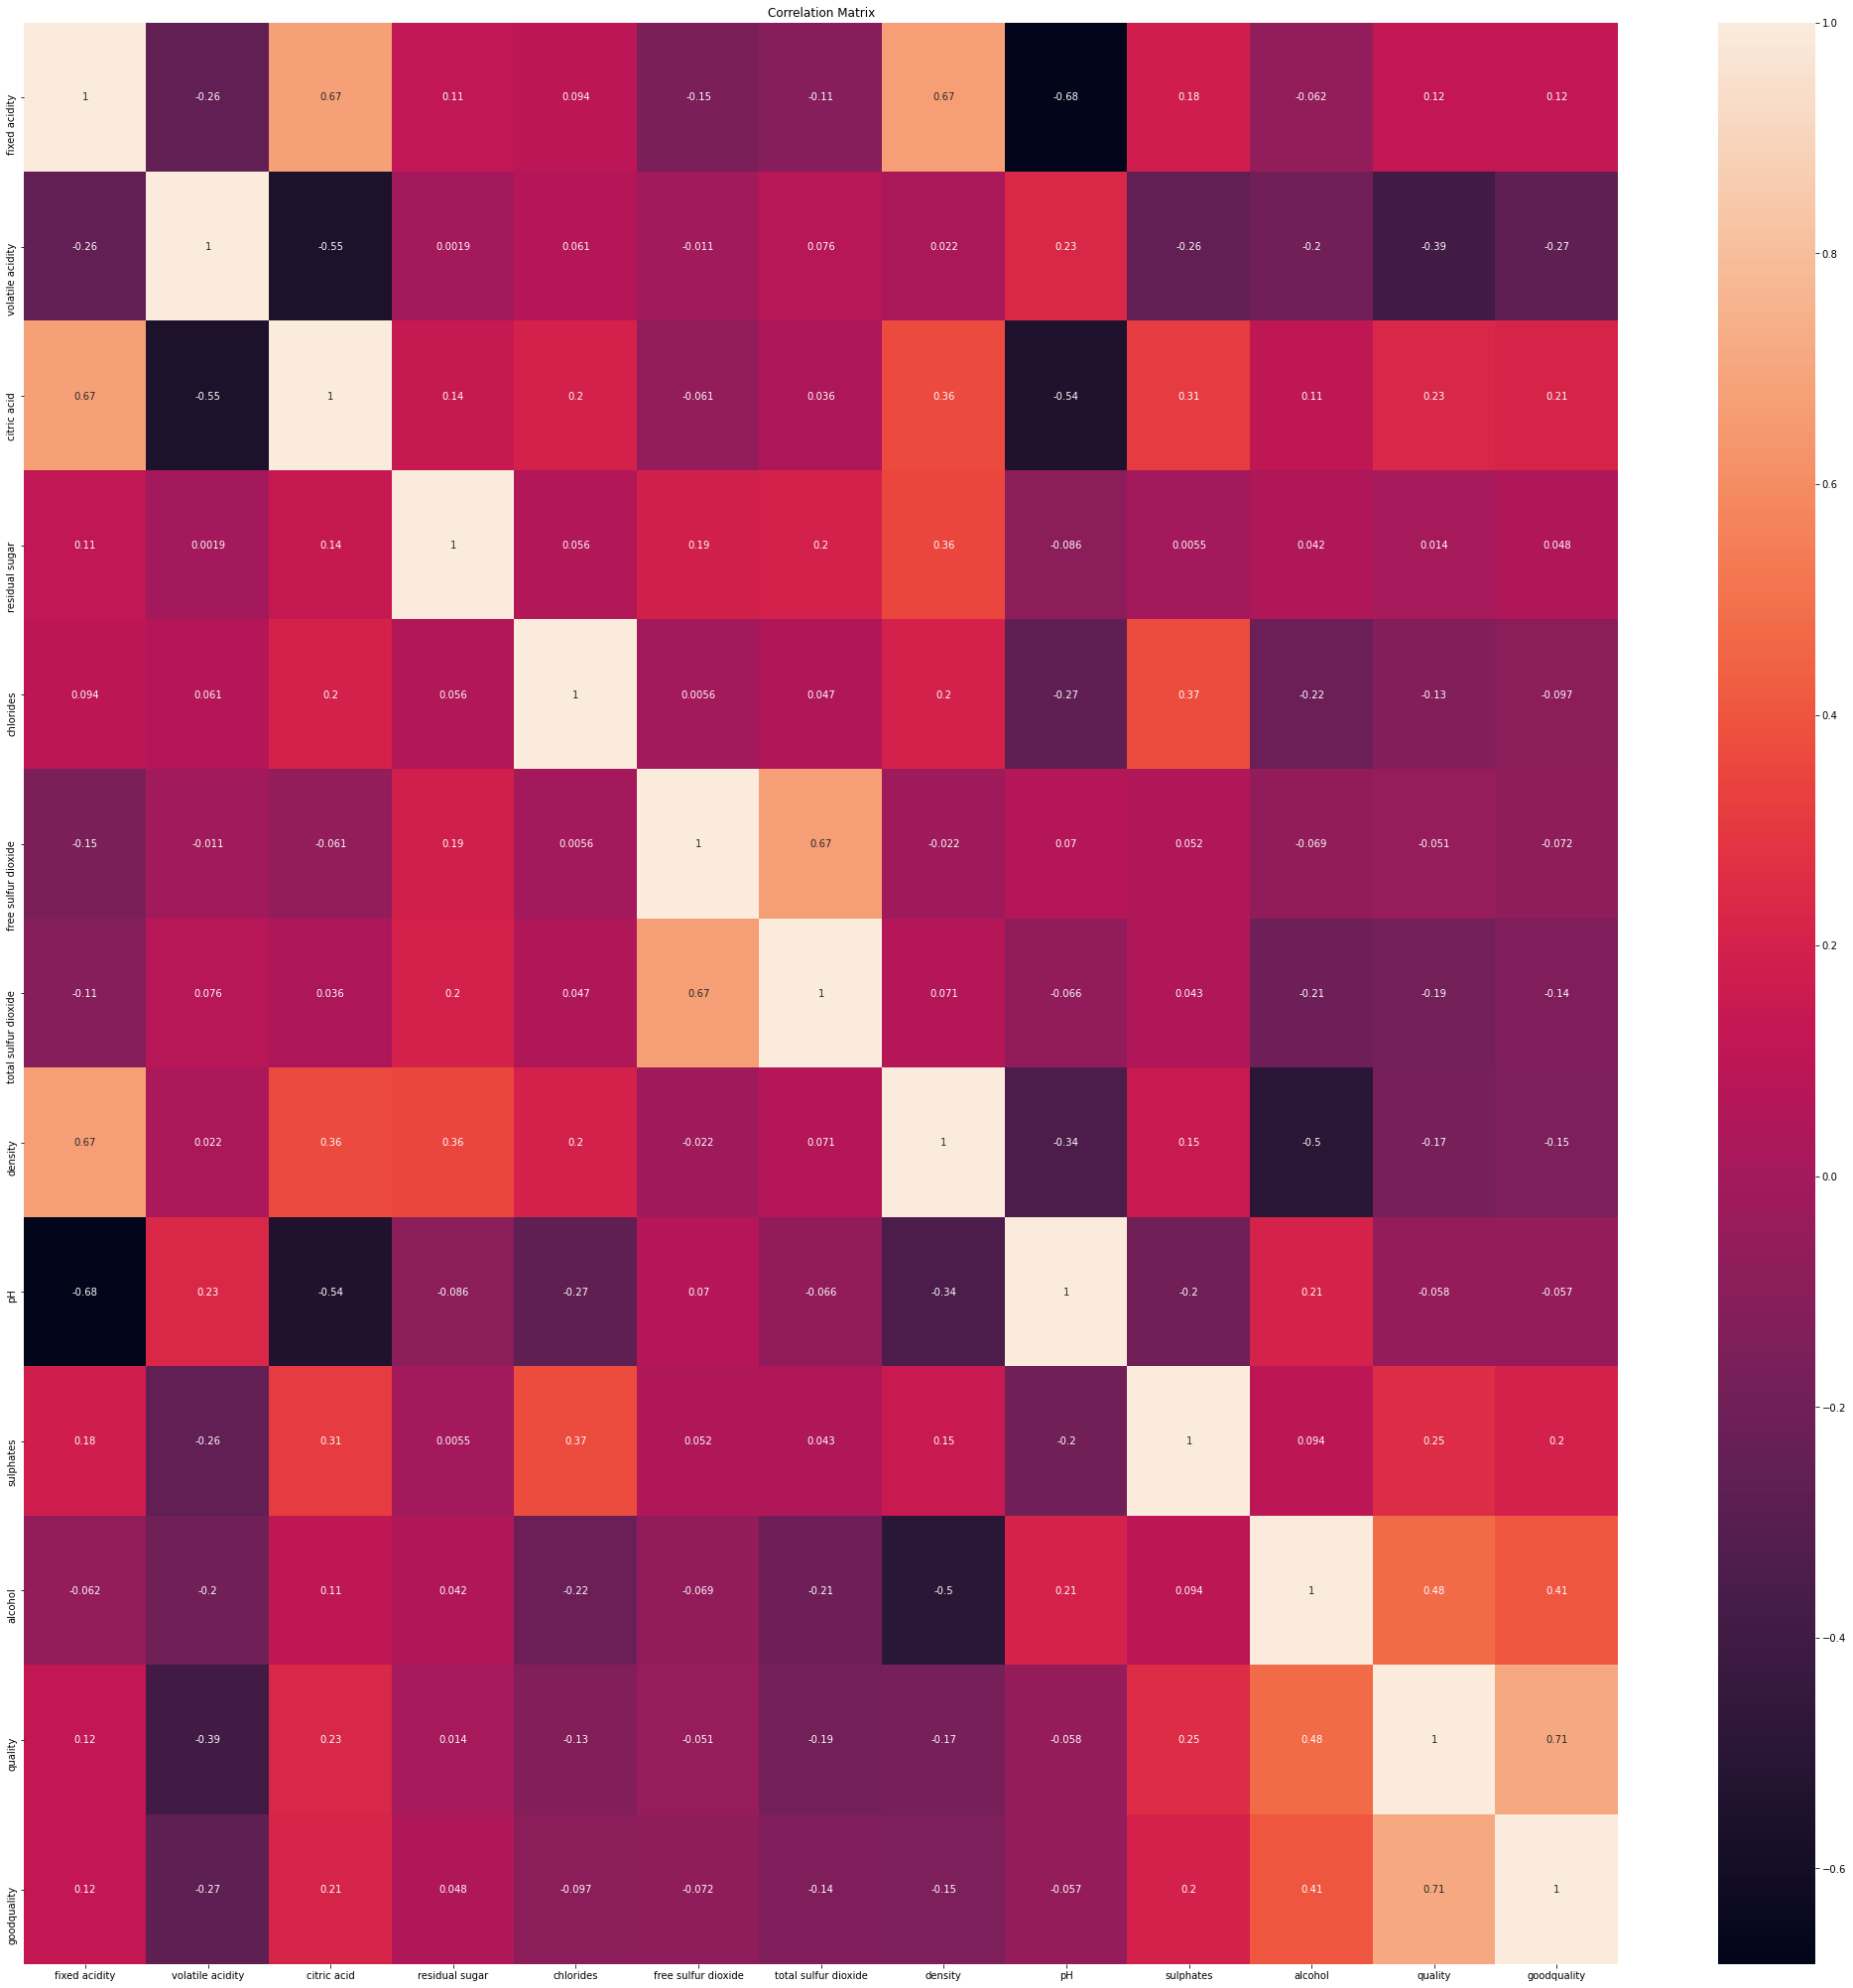

In [ ]:
plt.figure(figsize=[36,36])
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

This allows to get a much better understanding of the relationships between my variables in a quick glimpse.
Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features.

In [ ]:
df.corr()['goodquality'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
quality                 0.710196
goodquality             1.000000
Name: goodquality, dtype: float64

This shows the correlation of various colums to the good quality dependent variable

Now, we produce a boxlot diagram for each column to better understand the distribution of data and outliers

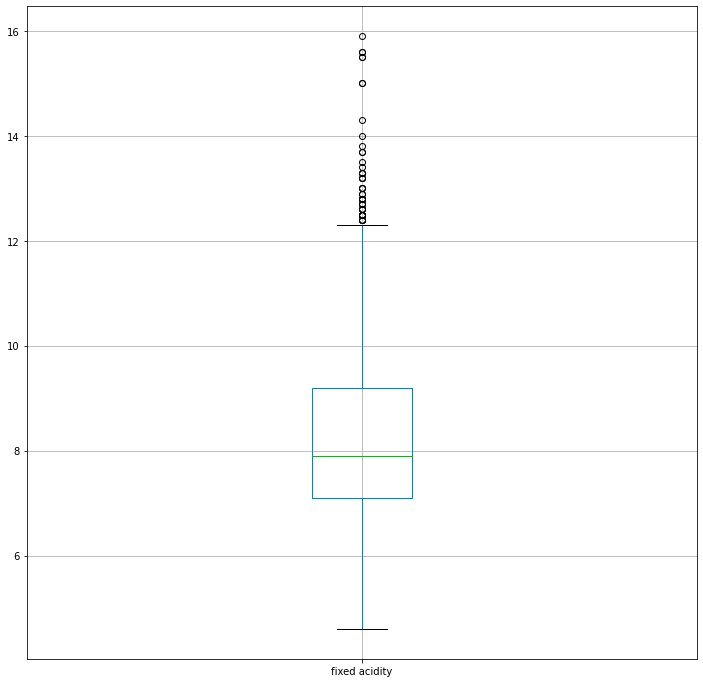

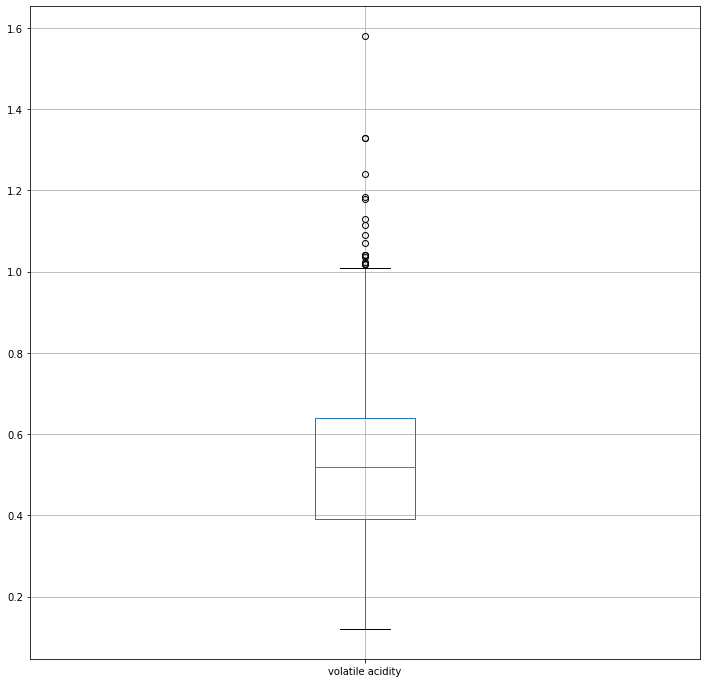

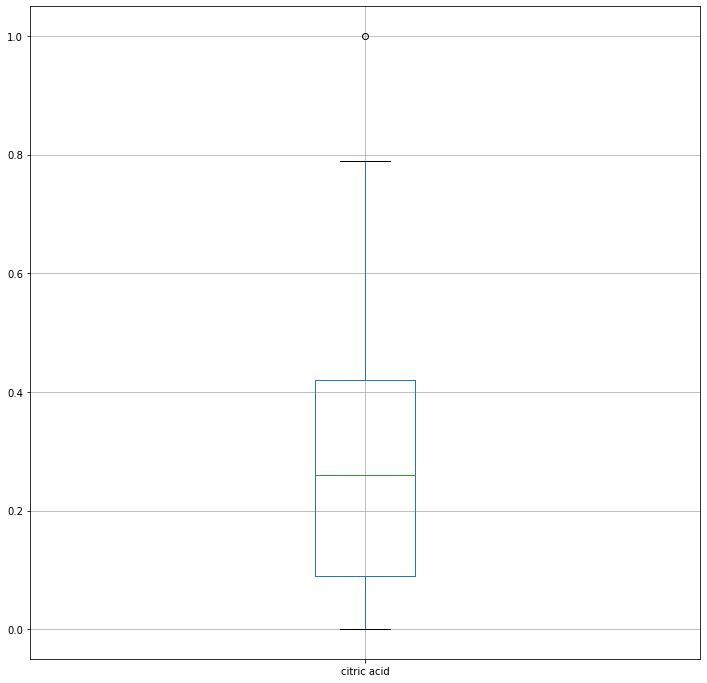

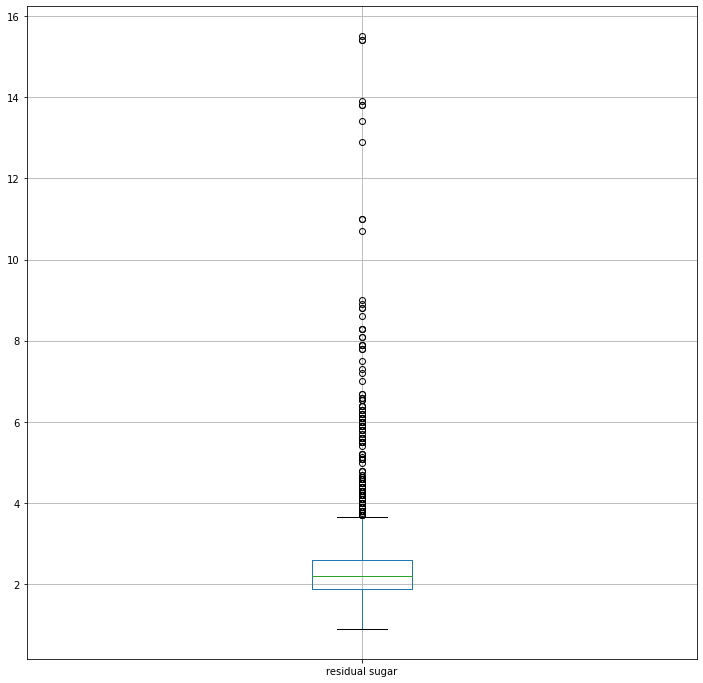

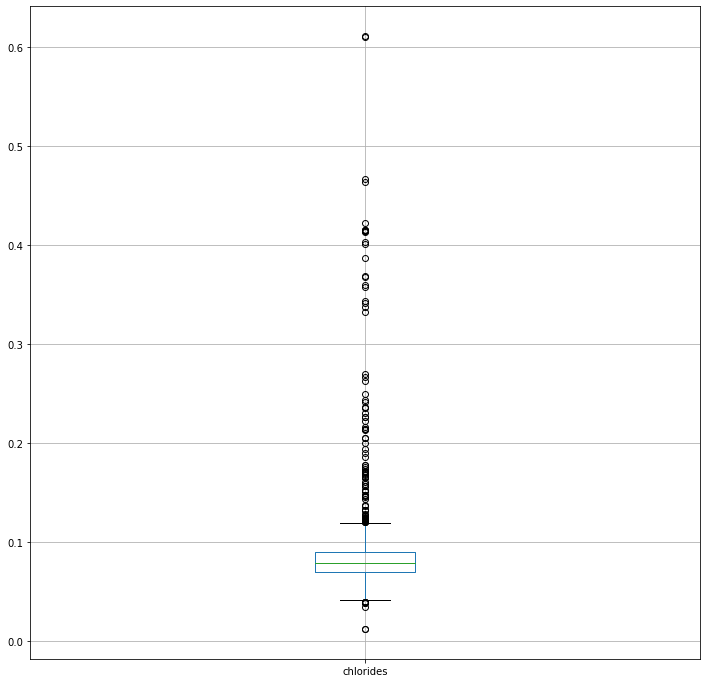

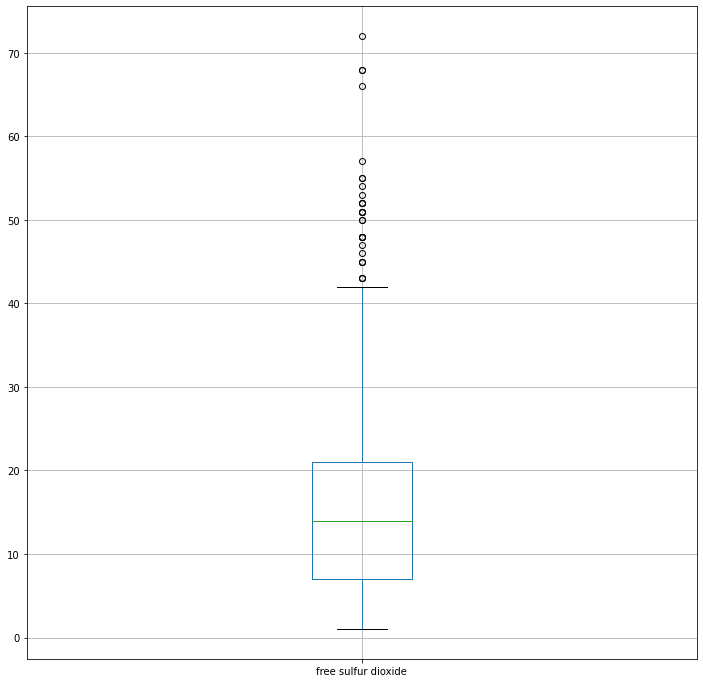

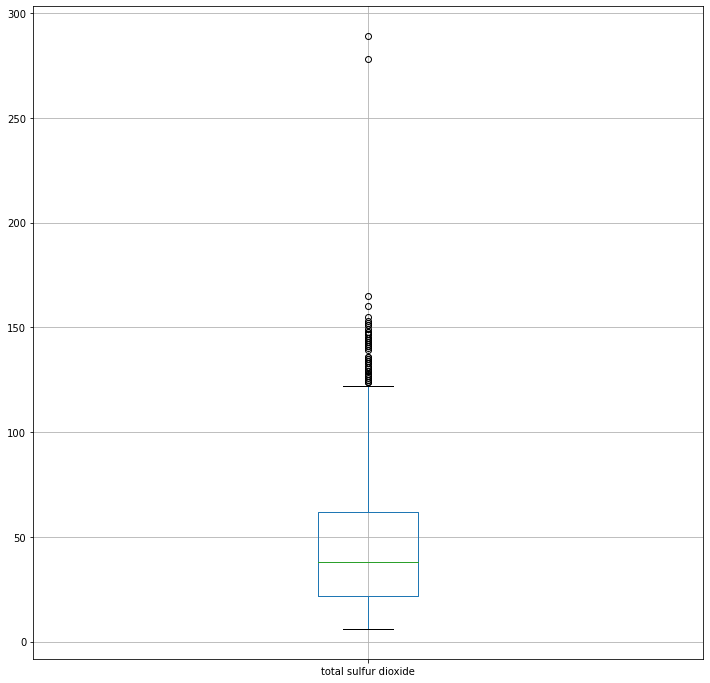

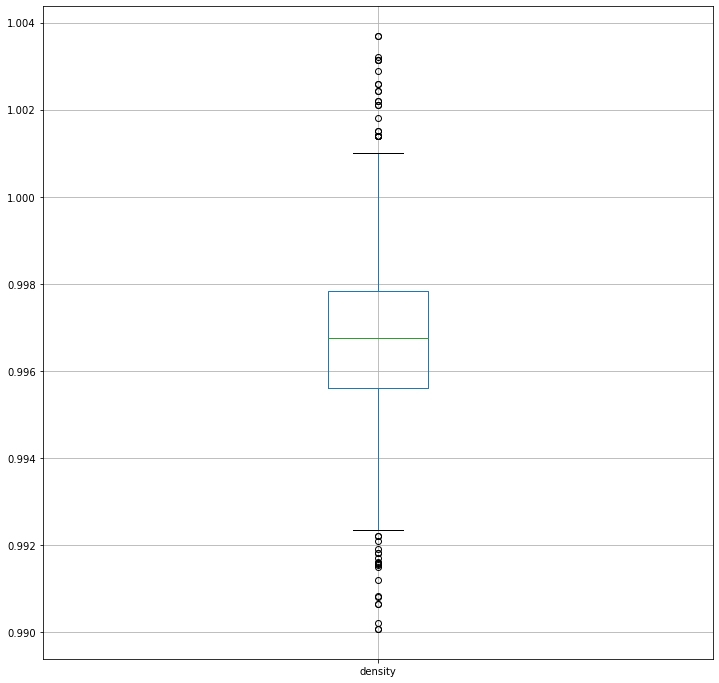

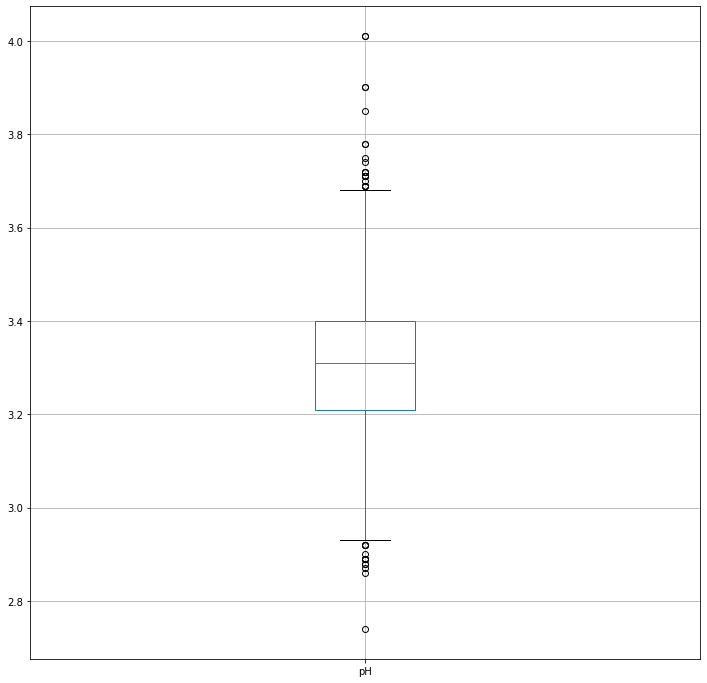

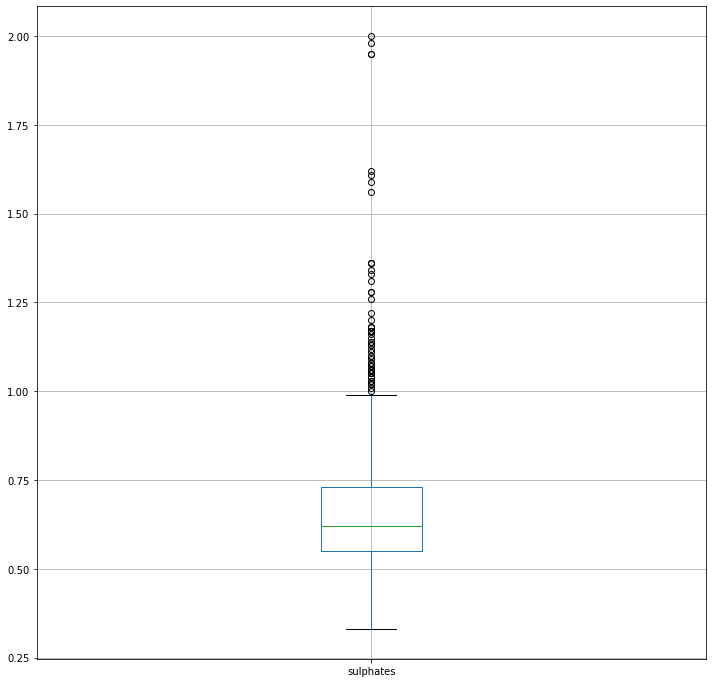

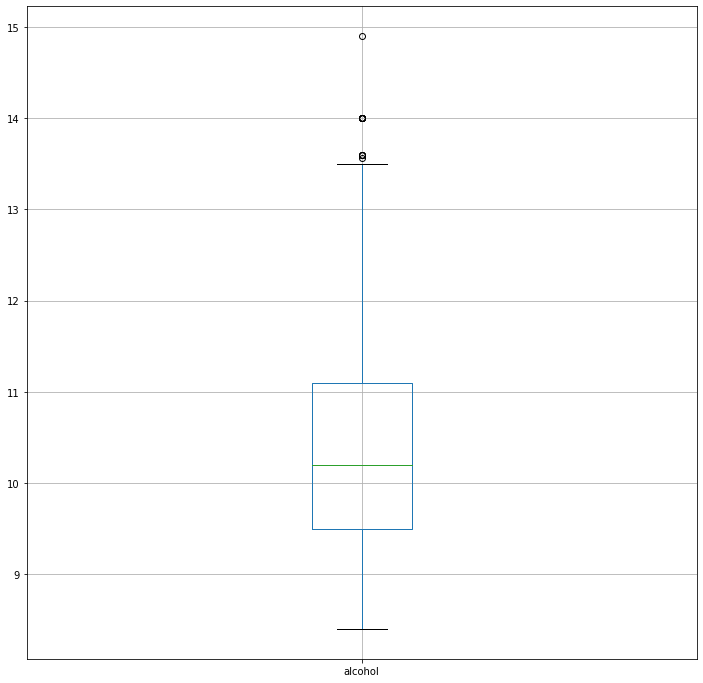

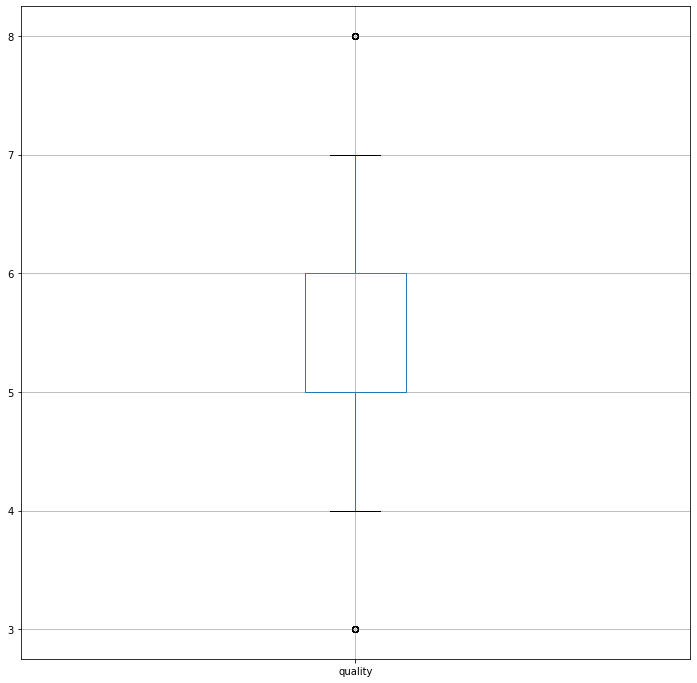

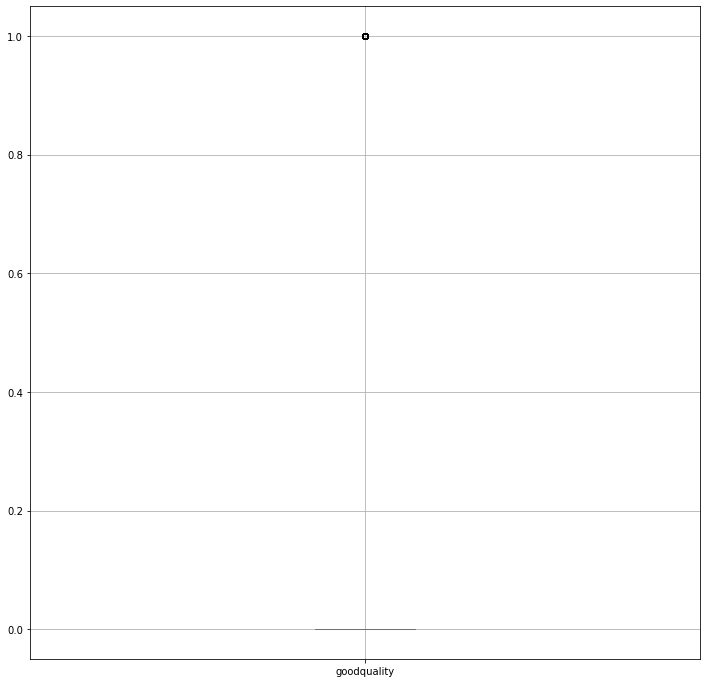

In [ ]:
for column in df:
    plt.figure(figsize=(12,12))
    df.boxplot([column])

In [ ]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

We see through the above boxplot that various data and are present with huge outliers, let us produce a density diagram for the columns to understand the distribution and skewness

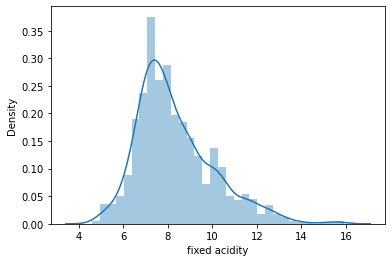

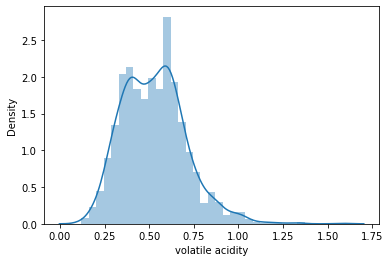

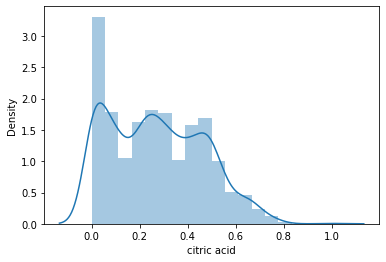

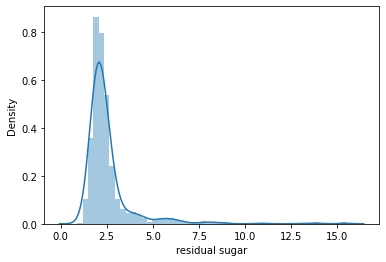

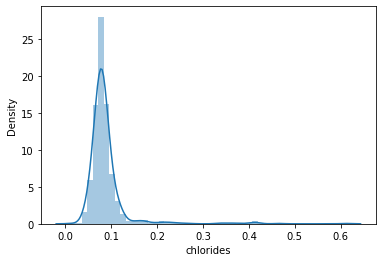

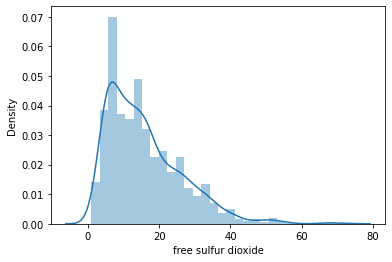

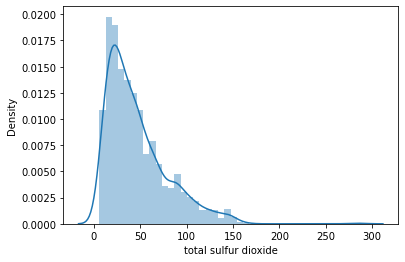

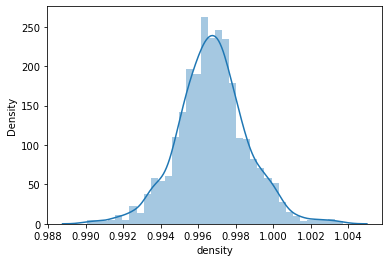

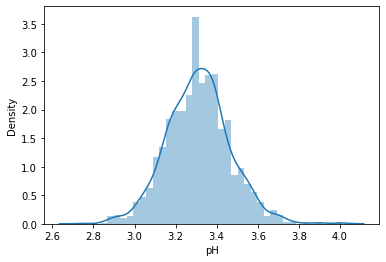

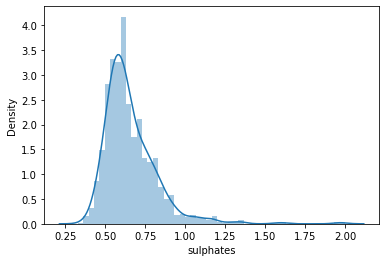

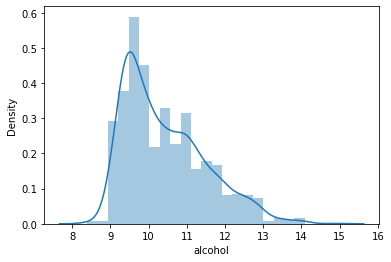

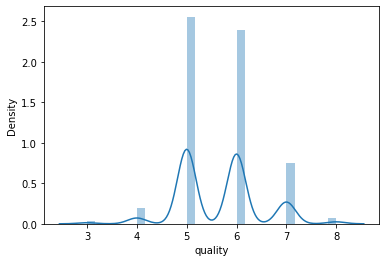

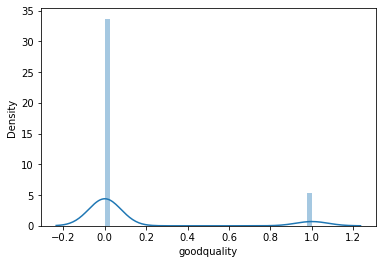

In [ ]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

We can produce that most of the columns are not normally ditributed while see the presence of skewness in the data

Let us now prepare the data to treat it for skewness and outliers and produce a normal distribution of the data for a better data modelling.

In [ ]:
df.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
goodquality             2.129363
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1599, 13)

We are using the zscore method to remove the outliers and treat the data for skewness

In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 13)
(1451, 13)


Here we can note that the outliers are removed from the data which reduces the data rows from 1599 to 1451

In [ ]:
df_new=df_new.drop('quality',axis=1)

We drop the quality column as we train the data to produce goodquality as the dependent variable

In [ ]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

With this above step we split the dataset into dependent variable y and the independent variable x

In [ ]:
from sklearn.preprocessing import power_transform
x=power_transform(x, method='yeo-johnson')

This power transform method removes all the skewness from the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

Standardizing Feature Variables with the above method

Now, the data is ready for modelling and now we find the best random state

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

We find the best random state to best fit the model


In [ ]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(maxAccu, maxRS)

0.9209621993127147 67


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=67)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 92.09621993127148
[[253   5]
 [ 18  15]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       258
           1       0.75      0.45      0.57        33

    accuracy                           0.92       291
   macro avg       0.84      0.72      0.76       291
weighted avg       0.91      0.92      0.91       291



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 86.94158075601375
[[235  23]
 [ 15  18]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       258
           1       0.44      0.55      0.49        33

    accuracy                           0.87       291
   macro avg       0.69      0.73      0.71       291
weighted avg       0.88      0.87      0.88       291



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 92.09621993127148
[[250   8]
 [ 15  18]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       258
           1       0.69      0.55      0.61        33

    accuracy                           0.92       291
   macro avg       0.82      0.76      0.78       291
weighted avg       0.91      0.92      0.92       291



# SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 90.72164948453609
[[254   4]
 [ 23  10]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       258
           1       0.71      0.30      0.43        33

    accuracy                           0.91       291
   macro avg       0.82      0.64      0.69       291
weighted avg       0.89      0.91      0.89       291



# Cross Validation

Now we do a cross validation to check the best fit model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.8731863964924754


In [ ]:
scr2 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr2.mean())

Cross validation score of Random Forest is: 	 0.871112691077142


In [ ]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr3.mean())

Cross validation score of Decision Tree is: 	 0.8152672117549471


In [ ]:
scr4 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr4.mean())

Cross validation score of SVC is: 	 0.8662898447683375


We can see that Logistic Regression performs the best among others

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'C': np.logspace(-3,3,7),
              'solver': ['newton-cg','lbfgs','liblinear']}

In [ ]:
gcv=GridSearchCV(lr,parameters,cv=5,scoring='accuracy')


In [ ]:
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
gcv.best_params_

{'C': 10.0, 'solver': 'newton-cg'}

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'solver': 'newton-cg'}
Accuracy : 0.8784482758620691


In [ ]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9209621993127147

# ROC AUC Plot

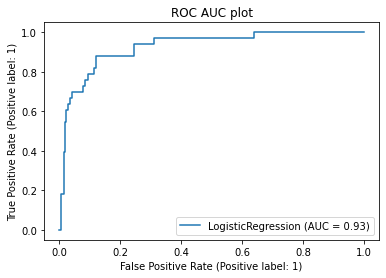

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

We got the AUC score of 93% which is very good

In [ ]:
import joblib
joblib.dump(gcv.best_estimator_,"RedWineQuality.pkl")

['RedWineQuality.pkl']